Running the code cell below will plot the cocurrence decay with time for the Bell state |00> and with a fixed coupling strength gamma = 0.2

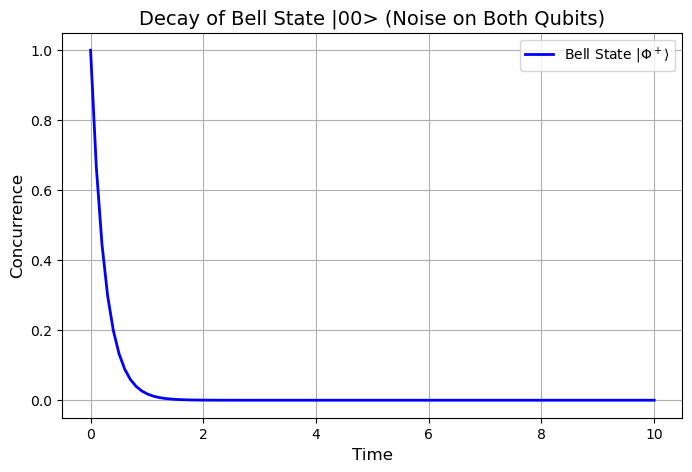

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from qutip import bell_state, ket2dm, tensor, qeye, sigmaz, mesolve, concurrence

# Start from Bell state 00, namely (1/sqrt(2)) * (|00> + |11>)
psi = bell_state('00')

density_matrix = ket2dm(psi)

# Define noise
gamma = 1 # coupling strength

# Create the collapse operators
c_operators = [
    np.sqrt(gamma) * tensor(sigmaz(), qeye(2)), # Collapse operator attacking qubit 1
    np.sqrt(gamma) * tensor(qeye(2), sigmaz()) # Collapse operator attacking qubit 2
]   

# Set the Hamiltonian to 0
# This is done in order to have our full focus on the decoherence
H = 0 * tensor(qeye(2), qeye(2))


# Snapshots of our simulation
times = np.linspace(0, 10, 100)
result = mesolve(H, density_matrix, times, c_operators)

concurrence_list = []
for state in result.states:
    concurrence_list.append(concurrence(state))
    
plt.figure(figsize=(8, 5))
plt.plot(times, concurrence_list, label=r'Bell State $|\Phi^+\rangle$', color='blue', linewidth=2)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concurrence', fontsize=12)
plt.title('Decay of Bell State |00> (Noise on Both Qubits)', fontsize=14)
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()


Running the code cell below will show a simulation for the decay of this Bell State, but with a slider, in order to control the coupling strength. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from qutip import bell_state, ket2dm, tensor, qeye, sigmaz, mesolve, concurrence
from ipywidgets import interact, FloatSlider
from IPython.display import display

# ============= SETUP CONSTANTS ============= #
psi = bell_state('01') # As last time, start from the 00 Bell state
times = np.linspace(0, 10, 100) # We want to observe concurrence from t = 0 to t = 10 using 100 equally spaced data points
density_matrix = ket2dm(psi) # This creates our density matrix
H = 0 * tensor(qeye(2), qeye(2)) # Set the Hamiltonian to 0 as we did above

# ============= SIMULATION FUNCTION ============= #
def simulate(gamma):
    """
    This function receives the coupling strength and returns the set of concurrences
    """

    # Create the collapse operators
    c_operators = [
        np.sqrt(gamma) * tensor(sigmaz(), qeye(2)),  # Collapse operator attacking qubit 1
        np.sqrt(gamma) * tensor(qeye(2), sigmaz()),  # Collapse operator attacking qubit 2
    ]
    
    # Solve the master equation
    result = mesolve(H, density_matrix, times, c_operators)
    
    # Map each of the resulting states into the right concurrence
    return list(map(lambda s: concurrence(s), result.states))


# ============= PLOT FUNCTION ============= #
def plot(gamma=0.2):
    # Create the figure and the line that we will manipulate
    fig, ax = plt.subplots() # Create the figure and a set of axes
    (line,) = ax.plot(
        times, simulate(gamma), lw=2
    ) # Plots the concurrence vs time in seconds
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Concurrence")

    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)
    
    plt.show()
    
interact(plot, gamma=(0, 1, 0.01))
    

interactive(children=(FloatSlider(value=0.2, description='gamma', max=1.0, step=0.01), Output()), _dom_classes…

<function __main__.plot(gamma=0.2)>

In [16]:
from ipywidgets import interactive
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from qutip import bell_state, ket2dm, tensor, qeye, sigmaz, mesolve, concurrence, Qobj
from ipywidgets import interact, FloatSlider
from IPython.display import display

# ============= SETUP CONSTANTS ============= #
times = np.linspace(
    0, 10, 100
)  # We want to observe concurrence from t = 0 to t = 10 using 100 equally spaced data points

H = 0 * tensor(qeye(2), qeye(2))  # Set the Hamiltonian to 0 as we did above

#! Explain why Hamiltonian is set to 0


# ============= SIMULATION FUNCTION ============= #
def simulate(gamma, density_matrix):
    """
    This function receives the coupling strength and returns the set of concurrences
    """

    # Create the collapse operators
    c_operators = [
        np.sqrt(gamma)
        * tensor(sigmaz(), qeye(2)),  # Collapse operator attacking qubit 1
        np.sqrt(gamma)
        * tensor(qeye(2), sigmaz()),  # Collapse operator attacking qubit 2
    ]

    # Solve the master equation
    result = mesolve(H, density_matrix, times, c_operators)

    # Map each of the resulting states into the right concurrence
    return list(map(lambda s: concurrence(s), result.states))


# ============= PLOT FUNCTION 2 ============= #
def plot(a, b, c, d, gamma=0.2):
    """
    Plots the concurrence graph, while recalculating the concurrence graph
    a, b, c, d are the probability amplitueds of the initial state
    """
    
    state_vec = np.array([a, b, c, d], dtype=complex)
    
    psi = Qobj(state_vec, dims=[[2, 2], [1, 1]]).unit()
    density_matrix = ket2dm(psi)  # This creates our density matrix
    print(psi)
    
    # Create the figure and the line that we will manipulate
    fig, ax = plt.subplots()  # Create the figure and a set of axes
    (line,) = ax.plot(
        times, simulate(gamma, density_matrix), lw=2
    )  # Plots the concurrence vs time in seconds
    ax.set_xlabel("Time [s]")

    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)

    plt.show()


gamma_slider = FloatSlider(min=0, max=1, step=0.01, value=0.2, description='Decay (γ)')

a_slider = FloatSlider(min=0, max=1, step=0.1, value=1.0, description='|00>')
b_slider = FloatSlider(min=0, max=1, step=0.1, value=0, description="|01>")
c_slider = FloatSlider(min=0, max=1, step=0.1, value=0, description="|10>")
d_slider = FloatSlider(min=0, max=1, step=0.1, value=1.0, description="|10>")


ui = interactive(plot, gamma=gamma_slider, a=a_slider, b=b_slider, c=c_slider, d=d_slider)
display(ui)



interactive(children=(FloatSlider(value=1.0, description='|00>', max=1.0), FloatSlider(value=0.0, description=…

Sudden Death of Entanglement